In [11]:
import pandas as pd
from pyramid.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot 

import numpy as np
from pandas import Series

#to plot within notebook
import matplotlib.pyplot as plt
#%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df=pd.read_csv("Share 'AUDJPY-2016-01.csv'")


#print the head
df.head()

,Date,Bid
0,20160104 00:00:00.154,87.640
1,20160104 00:00:00.922,87.640
2,20160104 00:00:01.185,87.640
3,20160104 00:00:01.311,87.641
4,20160104 00:00:01.472,87.641


In [12]:


df=df[df['Date'].str.contains('20160104 00:00:')]
df.head()

,Date,Bid
0,20160104 00:00:00.154,87.640
1,20160104 00:00:00.922,87.640
2,20160104 00:00:01.185,87.640
3,20160104 00:00:01.311,87.641
4,20160104 00:00:01.472,87.641


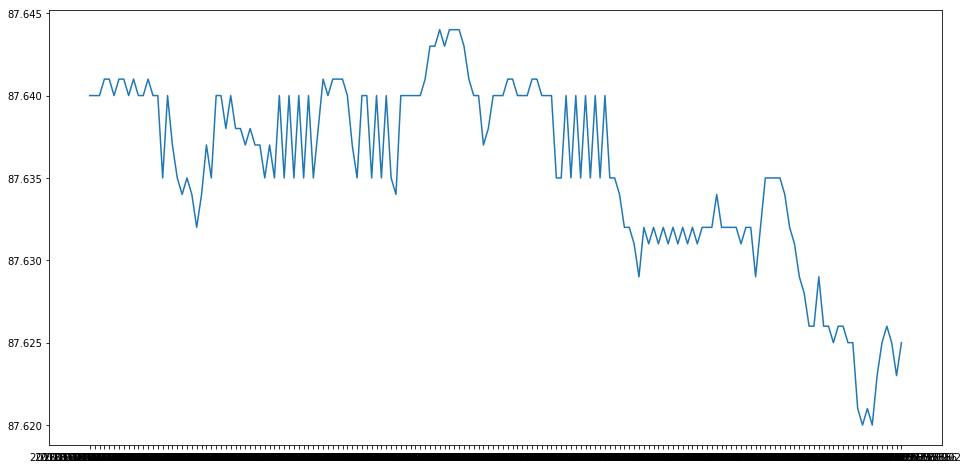

In [13]:
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Bid'], label='Close Price history')

/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

predicted=87.635110, expected=87.632000


predicted=87.633062, expected=87.632000


predicted=87.631895, expected=87.631000


predicted=87.631423, expected=87.629000


predicted=87.630013, expected=87.632000


predicted=87.629834, expected=87.631000


predicted=87.631201, expected=87.632000


predicted=87.631097, expected=87.631000


predicted=87.631735, expected=87.632000


predicted=87.631256, expected=87.631000


predicted=87.631562, expected=87.632000


predicted=87.631207, expected=87.631000


predicted=87.631566, expected=87.632000


predicted=87.631208, expected=87.631000


predicted=87.631569, expected=87.632000


predicted=87.631208, expected=87.631000


predicted=87.631572, expected=87.632000


predicted=87.631209, expected=87.632000


predicted=87.631888, expected=87.632000


predicted=87.631840, expected=87.634000


predicted=87.632610, expected=87.632000


predicted=87.633190, expected=87.632000


predicted=87.632085, expected=87.632000


predicted=87.632062, expected=87.632000


predicted=87.631749, expected=87.631000


predicted=87.631547, expected=87.632000


predicted=87.631277, expected=87.632000


predicted=87.631811, expected=87.629000


predicted=87.630896, expected=87.632000


predicted=87.630106, expected=87.635000


predicted=87.632520, expected=87.635000


predicted=87.634414, expected=87.635000


predicted=87.635234, expected=87.635000


predicted=87.635289, expected=87.634000


predicted=87.634617, expected=87.632000


predicted=87.633315, expected=87.631000


predicted=87.631673, expected=87.629000


predicted=87.630100, expected=87.628000


predicted=87.628366, expected=87.626000


predicted=87.626922, expected=87.626000


predicted=87.625593, expected=87.629000


predicted=87.626864, expected=87.626000


predicted=87.627506, expected=87.626000


predicted=87.626064, expected=87.625000


predicted=87.625681, expected=87.626000


predicted=87.624970, expected=87.626000


predicted=87.625788, expected=87.625000


predicted=87.625413, expected=87.625000


predicted=87.624977, expected=87.621000


predicted=87.623310, expected=87.620000


predicted=87.620359, expected=87.621000


predicted=87.620107, expected=87.620000


predicted=87.620014, expected=87.623000


predicted=87.621006, expected=87.625000


predicted=87.623728, expected=87.626000


predicted=87.625310, expected=87.625000


predicted=87.625671, expected=87.623000


predicted=87.623910, expected=87.625000
Test MSE: 0.0000032


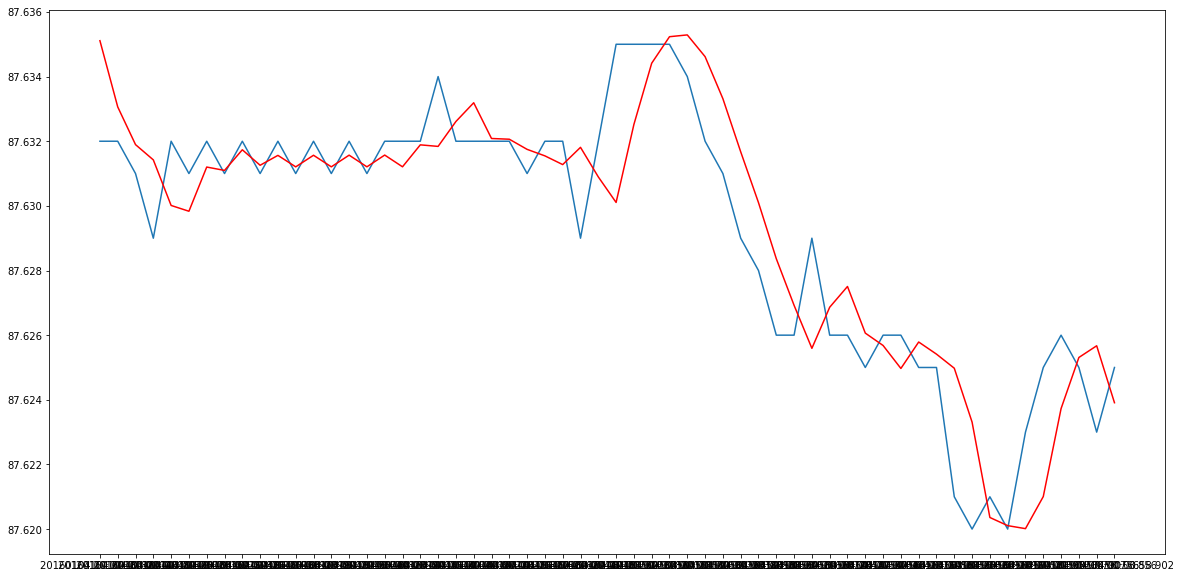

In [15]:
X = Series(df['Bid'])
size = int(len(df.index) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.7f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
